In [8]:
import requests 
import pandas as pd
import numpy 
import seaborn as sns
import matplotlib.pyplot as plt
print("done")

done


In [9]:
# Where is the majoirty of crime occuring?
# What is the most frequent category of offence? 
# Is there a trend in category of offence over time? (time series analysis)

params = {
    'lat': 50.805832,  # Latitude of Portsmouth
    'lng': -1.087222,   # Longitude of Portsmouth  
    'date': '2024-02'
}

response = requests.get("https://data.police.uk/api/crimes-street/all-crime", params=params)
print(response)

<Response [200]>


In [10]:
crime_json = response.json()
df = pd.DataFrame(crime_json)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
df.drop(labels=['context', 'persistent_id', 'location_subtype'], axis=1, inplace=True)
df.head()

,category,location_type,location,outcome_status,id,month
0,anti-social-behaviour,Force,"{'latitude': '50.818547', 'street': {'id': 1555012, 'name': 'On or near Connaught Road'}, 'longitude': '-1.079406'}",None,116778196,2024-02
1,anti-social-behaviour,Force,"{'latitude': '50.796451', 'street': {'id': 1554063, 'name': 'On or near White Swan Road'}, 'longitude': '-1.094214'}",None,116777000,2024-02
2,anti-social-behaviour,Force,"{'latitude': '50.819081', 'street': {'id': 1554390, 'name': 'On or near Sports/recreation Area'}, 'longitude': '-1.090120'}",None,116778206,2024-02
3,anti-social-behaviour,Force,"{'latitude': '50.810243', 'street': {'id': 1555564, 'name': 'On or near Aylesbury Road'}, 'longitude': '-1.069861'}",None,116777894,2024-02
4,anti-social-behaviour,Force,"{'latitude': '50.819081', 'street': {'id': 1554390, 'name': 'On or near Sports/recreation Area'}, 'longitude': '-1.090120'}",None,116778208,2024-02


In [11]:
for row in df:
    print(f"{row}: " + str(df[row].isnull().sum()))

category: 0
location_type: 0
location: 0
outcome_status: 77
id: 0
month: 0


In [12]:
df['id'].duplicated().sum()

0

In [13]:
df['month'].value_counts()

2024-02    932
Name: month, dtype: int64

In [14]:
df.dtypes
df['month'] = pd.to_datetime(df['month'])
df.dtypes

category                  object
location_type             object
location                  object
outcome_status            object
id                         int64
month             datetime64[ns]
dtype: object

In [15]:
outcome_status = []
for row in df['outcome_status']:
    if row is not None:
        outcome_status.append(row['category'])
    else:
        outcome_status.append('None')

df['outcome_status'] = outcome_status
df.sample(10)

,category,location_type,location,outcome_status,id,month
929,other-crime,Force,"{'latitude': '50.806840', 'street': {'id': 1554760, 'name': 'On or near Nelson Road'}, 'longitude': '-1.084093'}",Under investigation,116777729,2024-02-01
861,violent-crime,Force,"{'latitude': '50.817446', 'street': {'id': 1554423, 'name': 'On or near Parking Area'}, 'longitude': '-1.089223'}",Under investigation,116778162,2024-02-01
71,anti-social-behaviour,Force,"{'latitude': '50.794158', 'street': {'id': 1554820, 'name': 'On or near Montgomerie Road'}, 'longitude': '-1.081531'}",None,116776734,2024-02-01
133,criminal-damage-arson,Force,"{'latitude': '50.797516', 'street': {'id': 1555364, 'name': 'On or near Thorncroft Road'}, 'longitude': '-1.074115'}",Local resolution,116776986,2024-02-01
671,violent-crime,Force,"{'latitude': '50.800181', 'street': {'id': 1554806, 'name': 'On or near Northam Mews'}, 'longitude': '-1.082407'}",Under investigation,116777198,2024-02-01
770,violent-crime,Force,"{'latitude': '50.813869', 'street': {'id': 1555359, 'name': 'On or near Beaulieu Road'}, 'longitude': '-1.073452'}",Under investigation,116778021,2024-02-01
483,vehicle-crime,Force,"{'latitude': '50.802946', 'street': {'id': 1554956, 'name': 'On or near Church Road'}, 'longitude': '-1.080650'}",Investigation complete; no suspect identified,116777490,2024-02-01
634,violent-crime,Force,"{'latitude': '50.796687', 'street': {'id': 1553818, 'name': 'On or near Ordnance Row'}, 'longitude': '-1.103858'}",Under investigation,116776834,2024-02-01
786,violent-crime,Force,"{'latitude': '50.816537', 'street': {'id': 1555063, 'name': 'On or near Parking Area'}, 'longitude': '-1.078793'}",Under investigation,116778132,2024-02-01
38,anti-social-behaviour,Force,"{'latitude': '50.798059', 'street': {'id': 1555043, 'name': 'On or near Somers Road North'}, 'longitude': '-1.079057'}",None,116777087,2024-02-01


In [16]:
location = []
for row in df['location']:
    crime_loc = row['street']['name']
    crime_loc = crime_loc.replace('On or near', '')
    location.append(crime_loc)

df['location'] = location
df.sample(10)

,category,location_type,location,outcome_status,id,month
322,public-order,Force,Further/higher Educational Building,Under investigation,116776853,2024-02-01
160,criminal-damage-arson,Force,Heathfield Road,Investigation complete; no suspect identified,116778020,2024-02-01
34,anti-social-behaviour,Force,Cumberland Street,None,116777385,2024-02-01
201,drugs,Force,Supermarket,Local resolution,116778007,2024-02-01
313,public-order,Force,Omega Street,Unable to prosecute suspect,116776946,2024-02-01
824,violent-crime,Force,Shopping Area,Unable to prosecute suspect,116777093,2024-02-01
520,violent-crime,Force,Further/higher Educational Building,Investigation complete; no suspect identified,116776850,2024-02-01
652,violent-crime,Force,Vivash Road,Under investigation,116777055,2024-02-01
51,anti-social-behaviour,Force,Fraser Road,None,116776662,2024-02-01
631,violent-crime,Force,King Richard 1 Road,Under investigation,116776811,2024-02-01


([0, 1, 2, 3, 4],
 [Text(0, 0, 'violent-crime'),
  Text(1, 0, 'shoplifting'),
  Text(2, 0, 'public-order'),
  Text(3, 0, 'anti-social-behaviour'),
  Text(4, 0, 'criminal-damage-arson')])

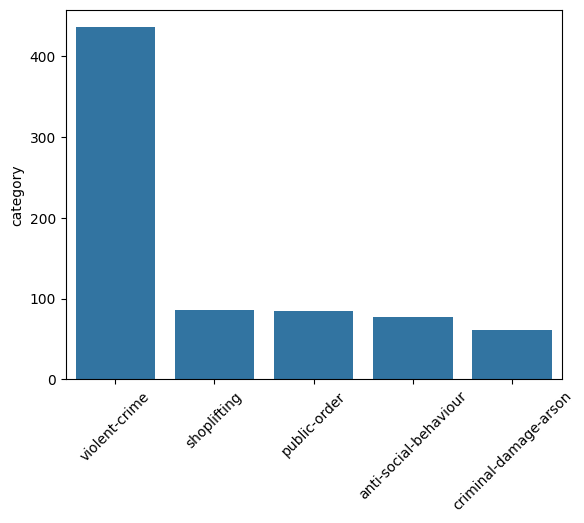

In [17]:
top_5_crime = df['category'].value_counts()[:5]
sns.barplot(top_5_crime)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4],
 [Text(0, 0, ' Parking Area'),
  Text(1, 0, ' Supermarket'),
  Text(2, 0, ' Guildhall Walk'),
  Text(3, 0, " Jacob's Street"),
  Text(4, 0, ' Shopping Area')])

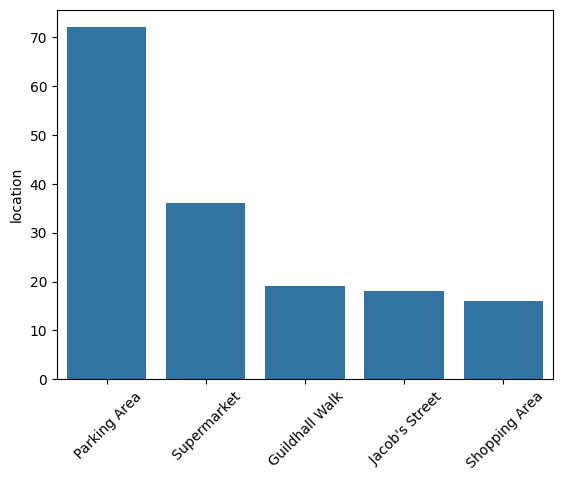

In [19]:
top_5_loc = df['location'].value_counts()[:5]
sns.barplot(top_5_loc)
plt.xticks(rotation=45)

([0, 1], [Text(0, 0, 'Force'), Text(1, 0, 'BTP')])

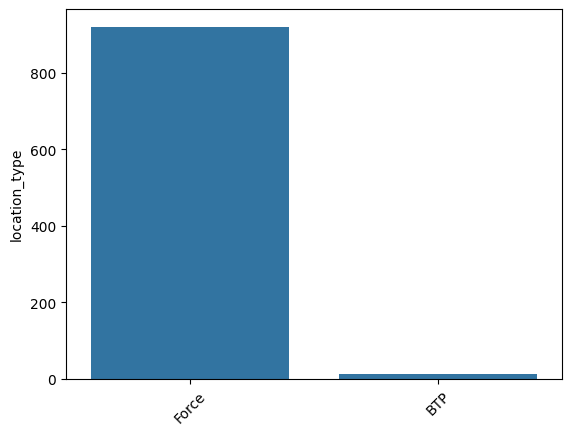

In [20]:
loc_type = df['location_type'].value_counts()
sns.barplot(loc_type)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Under investigation'),
  Text(1, 0, 'Investigation complete; no suspect identified'),
  Text(2, 0, 'Unable to prosecute suspect'),
  Text(3, 0, 'None'),
  Text(4, 0, 'Local resolution')])

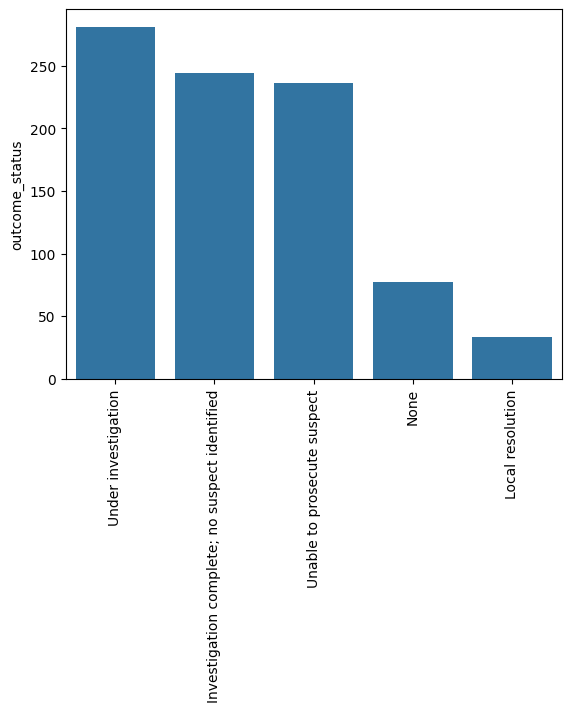

In [21]:
status = df['outcome_status'].value_counts()[:5]
sns.barplot(status)
plt.xticks(rotation=90)

In [22]:
df.shape

(932, 6)

In [23]:
df.to_csv("Crimes_Port_2024_02", index=False)